Isak Schwartz: - hours Anton Forsberg: - hours

# Assignment 3

In [1]:
#imports
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import DBSCAN
import pandas as pd
from sklearn.preprocessing import StandardScaler

# choose data
#path = 'data_200.csv'
#path = 'data_500.csv'
path = 'data_all.csv'

## 1: scatter plot
We first show the raw data unclustered

      residue name  position chain         phi         psi
0              LYS        10     A -149.312855  142.657714
1              PRO        11     A  -44.283210  136.002076
2              LYS        12     A -119.972621 -168.705263
3              LEU        13     A -135.317212  137.143523
4              LEU        14     A -104.851467   95.928520
...            ...       ...   ...         ...         ...
29364          GLY       374     B -147.749557  155.223562
29365          GLN       375     B -117.428541  133.019506
29366          ILE       376     B -113.586448  112.091970
29367          ASN       377     B -100.668779  -12.102821
29368          LYS       378     B -169.951240   94.233680

[29369 rows x 5 columns]


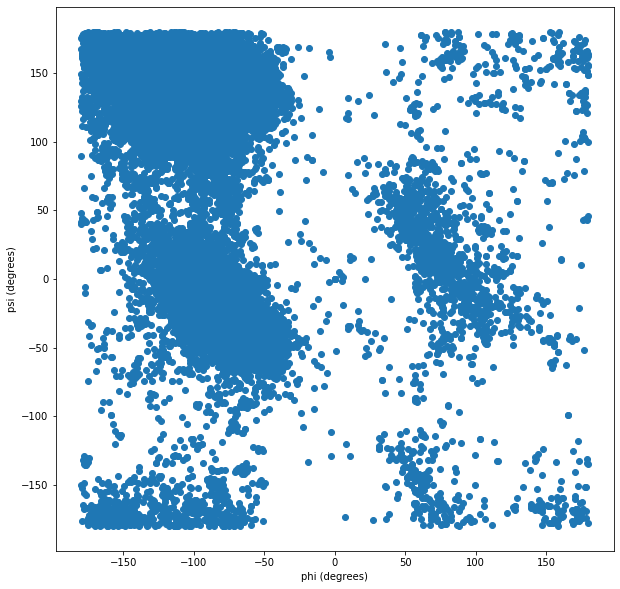

In [2]:
# read data
df = pd.read_csv(path)

# print data
print(df)

# scatter plot data
x = df['phi']
y= df['psi']
X = df[['phi','psi']]
plt.figure(figsize=(10,10))
plt.scatter(x, y)
# add labels
plt.xlabel('phi (degrees)')
plt.ylabel('psi (degrees)')
plt.show()

## 2: K means clustering
For both the unshifted and shifted data we will show some plots for some reasonable k values and discuss which ones are better or worse.

### 2.a: Try different k values
In the following plots we try different k values on the raw, non shifted, data. The results are not going to matter much since we are going to get better results with the shifted data but it's good to compare and discuss.

In [3]:
# function for drawing a k-means plot for a given k value
def drawClusters(k):
    drawClusters_Data(k, X, x, y)
# help function for drawing a k-means plot for a given k value and data
def drawClusters_Data(k, data, x, y): # k = # clusters
    # create clusters
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    
    plt.figure(figsize=(10,10))
    
    # we predict because we want to color the data points acording to what cluster they belong to
    predict = kmeans.predict(data)
    
    # draw data points
    plt.scatter(x, y, c=predict)

    # draw cluster centers
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')

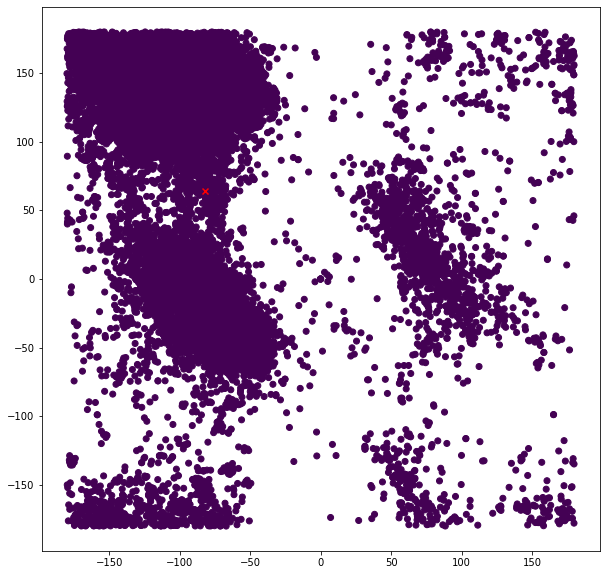

In [4]:
# k = 1
drawClusters(1)

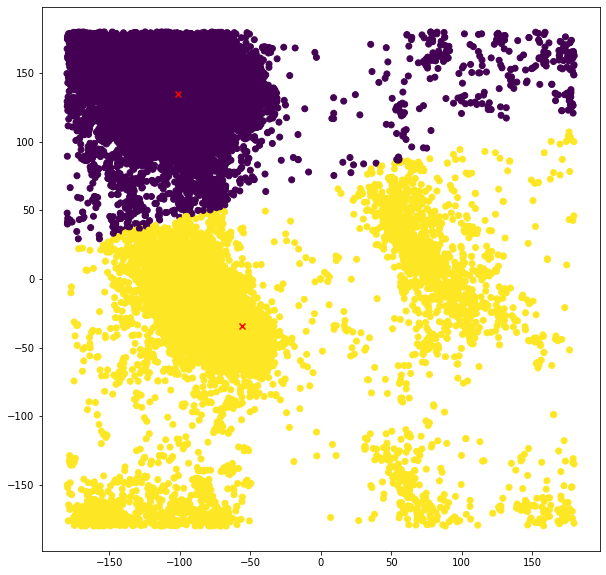

In [5]:
# k = 2
drawClusters(2)

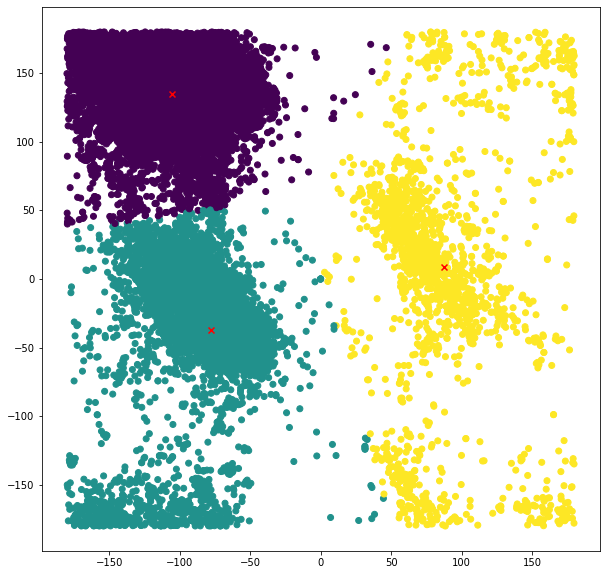

In [6]:
# k = 3
drawClusters(3)

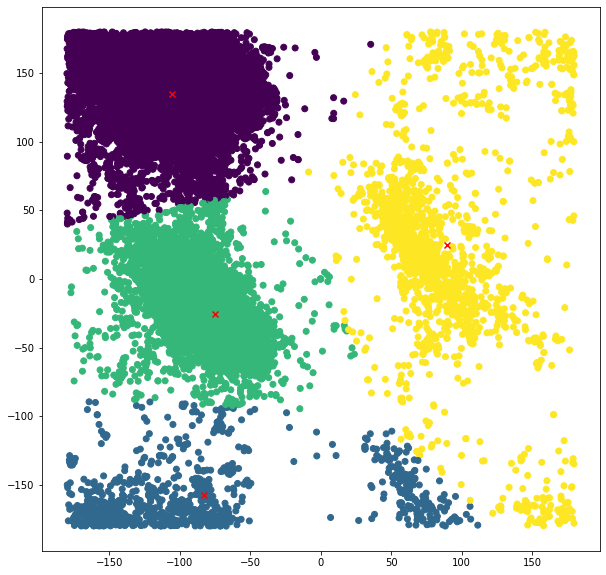

In [7]:
# k = 4
drawClusters(4)

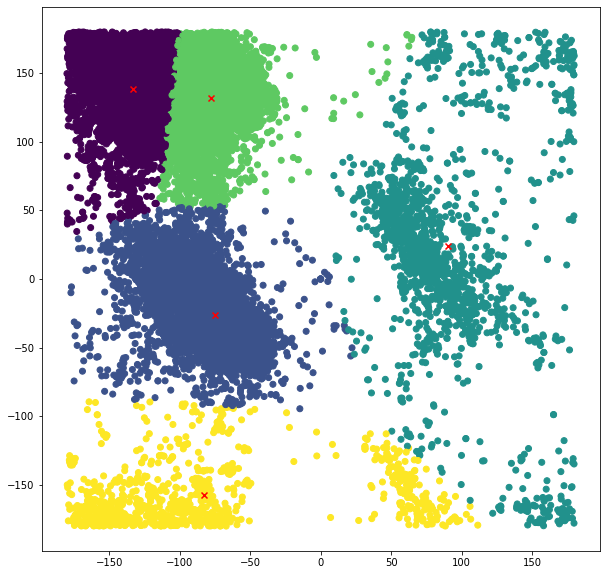

In [8]:
# k = 5
drawClusters(5)

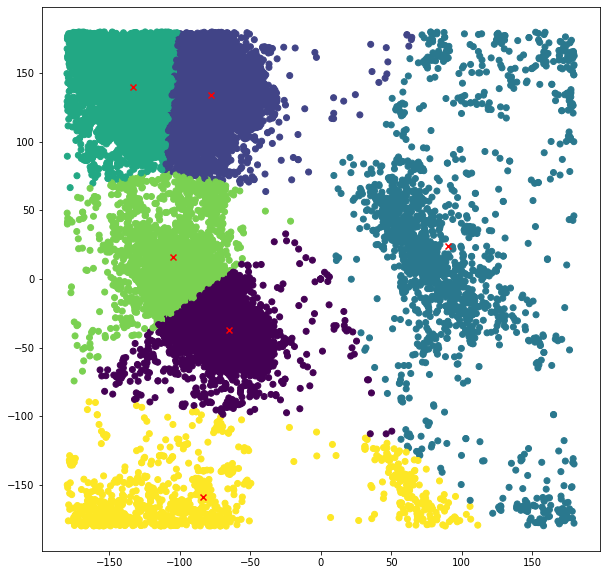

In [9]:
#k = 6
drawClusters(6)

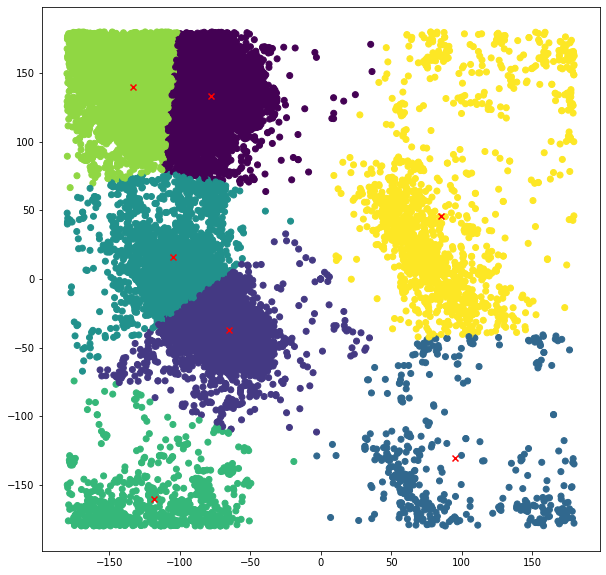

In [10]:
#k = 7
drawClusters(7)

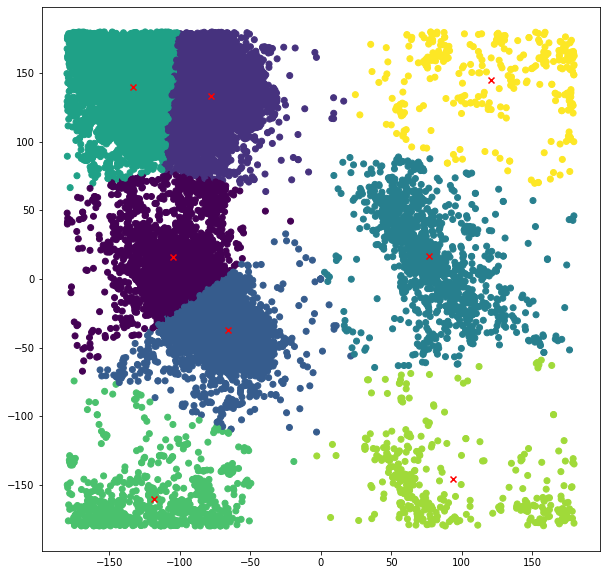

In [11]:
#k = 8
drawClusters(8)

We can assume there are 4 underlying clusters by looking at the scatter plot of the data in the shifted data below, meaning k=4 should be suitable. The clusters appear to be spread about some center point somewhat uniformly, meaning k-means clustering would be suitable here. DBSCAN could probably also work but it might have some problems separating clusters since some underlying clusters are very close to each other. We never have two different clusters are centered around the same point in any part (like in the example from lectures where we have two ring clusters) (neither locally or overall) though, meaning DBSCAN is not needed to separate the clusters.

We mentioned there seems to be 4 underlying clusters in the shifted data but if we solely look at the data in its raw form above there seems to be 6 to 7 clusters. We get more clusters since two clusters are cut off at the top, wrapping around

If we try to make one cluster for each of these using k mean we will model more clusters than what there are in practice. This is not a huge problem though since it is more important to divide clusters that belong to different underlying clusters than what it is to group all parts of each underlying clustes to the same cluster. This is because even if an underlying cluster gets divided up into 2 or more different cluster using k-means, we can still say that all those clusters should be categorized under the same category (the same underlying cluster).

Judging from the plots above, k=8 seems to give the best result even though there doesnt appear to be that many in the unshifted data. The other possible candidates (k=6 and k=7) have the downside that they think the data at the top right and sparse underlying cluster below belong to the same cluster, which is not the case if you look at the shifted data. This does not happen for k=8, but we have the problem that both of the big underlying clusters are divided in half. As mentioned though, thi is not a problem because one could say each half actually belongs to each other (which could easily be done with a python program) after making the clusters. The same goes for the clusters in the bottom left corner and the right corners, these actually belong to the big upper cluster but are classified as their own cluster, but in the same way, we can say they belong to the big one after the clustering is done.

Note that we tried to get better centroid placements by changing the seed for the clustering 8 times but got rougly the same results.

### 2.b: Validate clusters

We use the elbow method to verify the clusters. The elbow method entails making a graph for k-means clusterings for different k values. The x axis has the k value and the y axis has the maximum distance betweem two points within the clusters. To find the best candidate according to this method, one should pick the k value corresponding to the point where the graph's slope changes the most. This is because this point generally corresponds to where increasing the k value will only mean dividing up already coherent clusters further (that correspond to an underlying cluster), rather than dividing up clusters that actually consist of multiple underlying clusters.

the code below plots the elbow curve

In [12]:
# function for plotting elbow curve
def ElbowCurve():
    ElbowCurve_Data(X)
    
def ElbowCurve_Data(Data):
    # get max inner cluster distances between data
    distorsions = []
    max = 15
    if(15 > len(Data.index)):
        max = len(Data.index) # beacuse k can not be larger then the data set
        
    for k in range(2, max):
        kmeans = KMeans(n_clusters=k) 
        kmeans.fit(Data)
        distorsions.append(kmeans.inertia_)
    # plot elbow curve
    fig = plt.figure(figsize=(15, 5))
    plt.plot(range(2, max), distorsions)
    plt.grid(True)
    plt.title('Elbow curve')

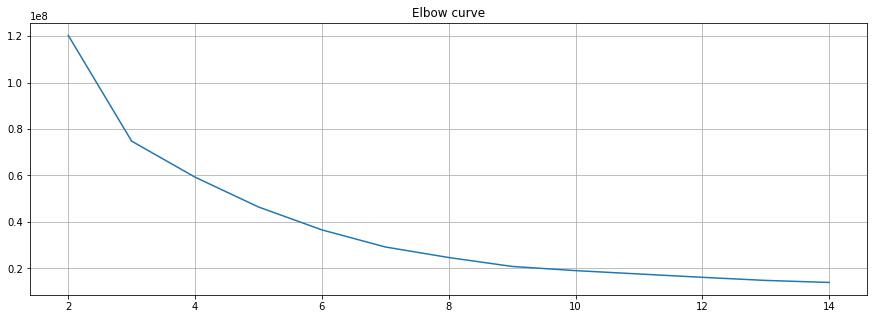

In [13]:
ElbowCurve()

The curve implies k=3 is the best candidate and there is not big change of slope at k=8. This method might have problems since we cant place one centroid at each cluster due to them having different densities for example. So we will still say k=8 is the best.

### 2.c: Reason about clusters in 2.a
To expand on the the reasoning in 2.a, the centers for the cluster found using k-means with k=4 do all seem to be in the center for each cluster. This makes sense given that k means assign data to the centroid they are the closest to generally

### 2.d: Shifting data for better results
We shift the data so that no underlying cluster wraps around any border of the plot. We do this so that we are more likely to get a cluster using k-means that covers an entire underlying cluster. We also simply add 360 to each axis rather than use modulo, but it has the same result basically. 

In [14]:
# help function for converting negative angels to positive.
def add360(n): 
    if n < 0: # if n is a negative angle add 360 degrees
        return n +360
    return n

In [15]:
df['phi'] = df['phi'].map( lambda n: add360(n))  # Shifting data for better results
df['psi'] = df['psi'].map( lambda n: add360(n + 100)) # Shifting data for better results, shift by 100 degrees

# replace the data with the new shifted valus (we will use these valus for the rest of the assignment)
x = df['phi'] 
y= df['psi']
X = df[['phi','psi']]

Below we show a few plots for different k values

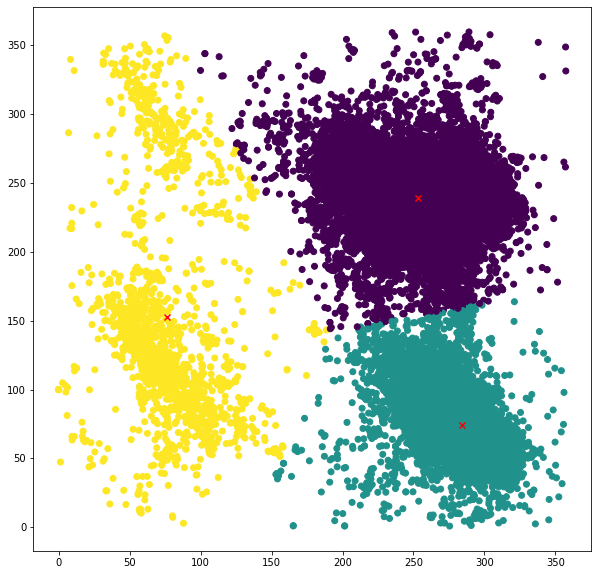

In [16]:
#k = 3
drawClusters(3)

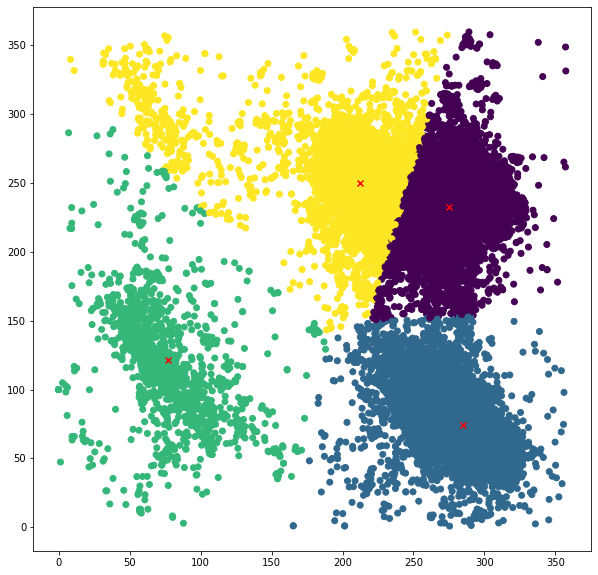

In [17]:
#k = 4
drawClusters(4)

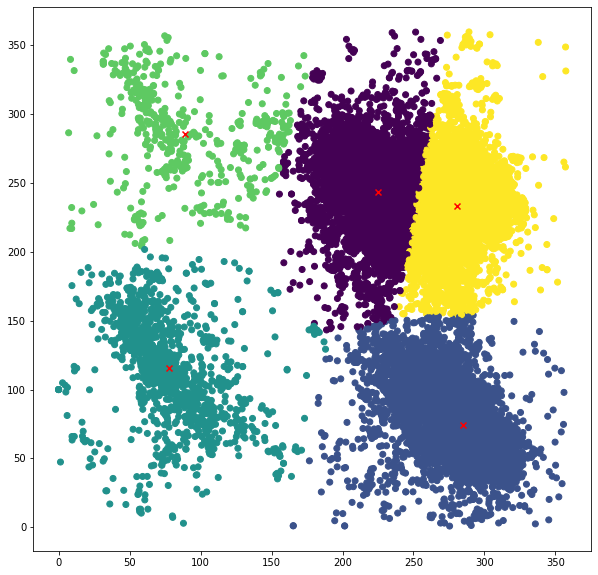

In [18]:
#k = 5
drawClusters(5)

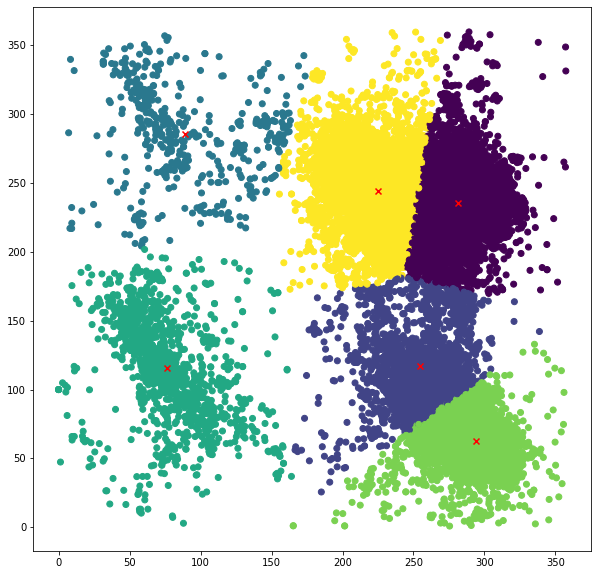

In [19]:
#k = 6
drawClusters(6)

As mentioned, there seems to be 4 underlying clusters but using k=4 makes the big top right cluster merge into the sparse top left cluster. k=5 doesnt have this problem but it makes the big cluster split it 2. This isnt a huge problem as described in the discussion about the unshifted data. So k=5 is the best candidate.

Below we do the elbow method for the shifted data to validate k=5 

#### Validate clusters with shifted data

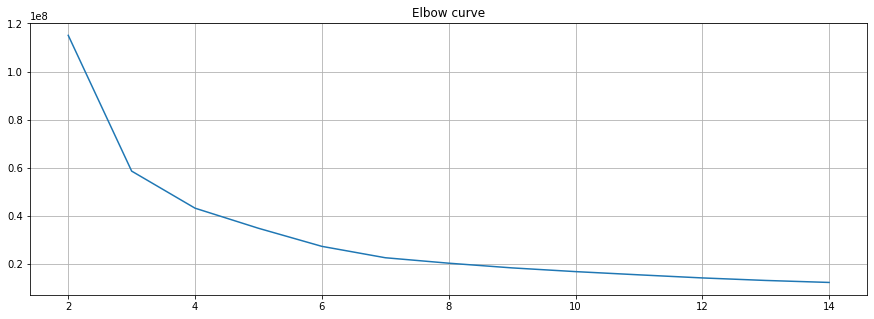

In [20]:
ElbowCurve()

Once again we see that the slope doesnt change the most dramatically where we expect it to, at k=5. But it is still the best candidate

If we compare the shifted clustering to the unshifted clustering overall, the shifted one is better. It is more intuitive since each underlying cluster is coherent in the plot.

The shifted values will be used for the rest of the assigmnet. 

## 3: DBSCAN clustering

In [21]:
# start point for centers
centers = [[1, 1], [-1, -1], [1, -1]]


In [22]:
# help function for creating bar charts of the most frequent outliers
def barplotOutliers(db, df):

    aminos = list(df['residue name'].unique()) # array of all the amino acid residue types 
    aminoOutliers = np.zeros(len(aminos)) # array filled with zeros. will stor the number of outliers for every amino acid residue type

    result = zip(df['residue name'],db.labels_)
    for name, label in result:
        if(label == -1): # outliers have the label -1
            index = aminos.index(name) 
            aminoOutliers[index] = aminoOutliers[index] + 1
    
    plt.figure(figsize=(10,5)) # change the size of the figure
    plt.bar(aminos, aminoOutliers) # plot the bar chart

    # add labels
    plt.ylabel('Outliers')
    plt.title('Most frequent outliers')
    
    # create bar charts for the proportion of outliers
    plotProportionOFOutliers(aminos,aminoOutliers,df)

    plt.show()

In [23]:
# a help function creating bar chart, showing what proportion of a amino acid type is outliers
def plotProportionOFOutliers(aminos, aminoOutliers, df):
    
    proportion = np.zeros(len(aminos)) # array that will store the result
    
    for name in aminos:
        nAminoType = len(df.loc[df['residue name'] == name]) # the total amount of amo acid data point of the type name
        index = aminos.index(name)
        proportion[index] = aminoOutliers[index] / nAminoType # calulate the proportion
        
    plt.figure(figsize=(10,5)) # change the size of the figure
    plt.bar(aminos, proportion) # plot the bar chart

    # add labels
    plt.ylabel('percentage')
    plt.title('Proportion of outliers')

    plt.show()

In [24]:
# help function for drawing dbscans for given max distance and min sample

def drawDBSCAN(max_distance, min_samples):
    drawDBSCAN_Data(max_distance, min_samples, X, df)

def drawDBSCAN_Data(max_distance, min_samples, data, df):
    X = StandardScaler().fit_transform(data)
    
    # Compute DBSCAN
    db = DBSCAN(max_distance, min_samples).fit(X)
    
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    # Plot result
    plt.figure(figsize=(10,10))
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()
    
    barplotOutliers(db, df)# draw bar plot of most frequent outliers
    
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)

### 3.a: Motivate min samples & max distance

#### Choice of parameters
We experimented with different values, varying one parameter at a time to try and find values that would give 4 clusters and few noise points. We want this because there seems to be 4 main clusters and the fewer noise points we have, the more data will be able to be classified or clustered by the DBSCAN. 

However, We found that it is impossible or at least very hard to get 4 clusters that cover the actual clusters that one can see in the data. We were almost able to get 4 clusters which is described in case 1 below. However, it might be more valuable to only divide the data into 3 cluster since that can be done with less noise points and more robustness, as described in case 2 and 3 below. In case 2 we include the sparse cluster at the top left, but let the two big clusters on the right merge together, and vice versa for case 3. We discuss each case and then choose a final candidate at the end

For each case, we show that the first demonstrated parameters for the DBSCAN give a good solution by demonstrating that increasing or deacreasing either of the two parameters will have some downside. These downsides include either giving more noise points or changing the overall clustering such as merging two clusters or adding new small clusters. Note that the solutions arent 100% optimal, one could probably fine tune the parameters even more to reduce noise using some advanced solver, but we show that the solutions are sufficient by demonstrating that altering the parameters with a relatively small step will still make the clusterings worse. Note however that the current clusterings below don't take robustness into account. We discuss how altering the parameters demonstrates the robustness in each case and in the next section we propose a way to make the final candidate for the parameters more robust.

### 3.b: Visualization and outliers
For each of the following cases we also show the disctribution of outliers. Both in terms of absolutes (how many outsielrs there are of each amino acid) and in terms of relative amounts (how many % of each amino acid is outliers). Overall we see that GLY has the most outliers, in both terms.

#### case 1: 4 (really 5) clusters (max distance = 0.13, max samples = 46)
It is possible to divide up the data into 4 main clusters according to how we want, using the values below, shown in the plot below. Note that we get one small extra cluster on the top right that should really belong to the big cluster below it, but we could just say that this small cluster actually belongs to the big one afterwards. Overall, this solution if not very good in practice, it does distinguish the 4 main clusters, but the main problem is that the top left cluster is very small. This means a lot of noise data points that that actually belong to the cluster in reality don't get included in the cluster. The same goes for the other clusters, we see a lot of noise points around them that we can easily tell where they actually belong. 

If we look at the bar charts 35% of all amino acid residues of type GLY are outliers. Some othe acid types are almost up to 10% outliers. This is one other sign that this is not a particuilar good result. 

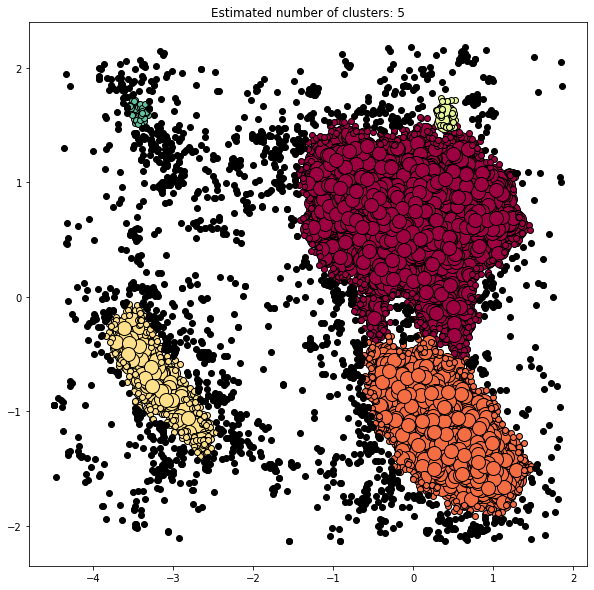

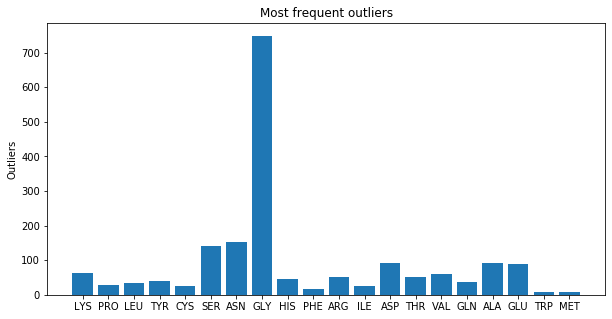

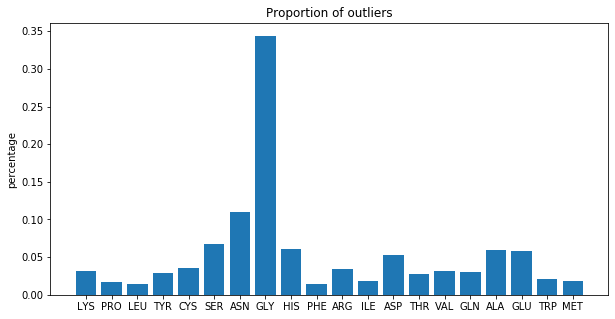

Estimated number of clusters: 5
Estimated number of noise points: 1810


In [25]:
drawDBSCAN(0.13,46)

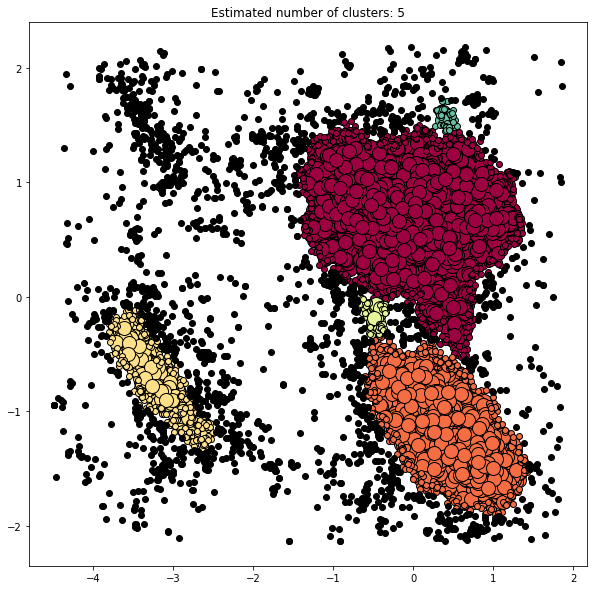

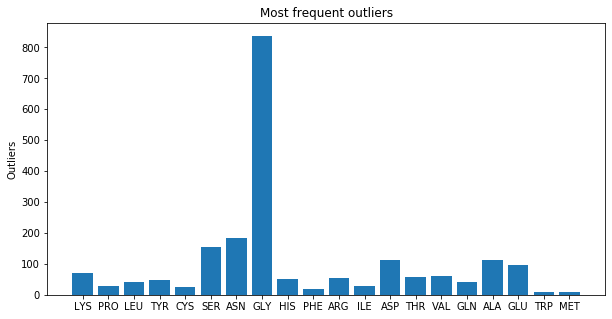

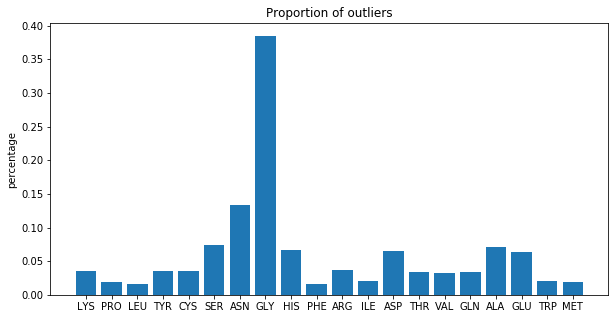

Estimated number of clusters: 5
Estimated number of noise points: 2044


In [26]:
# decrease max distance, gives more noise and another cluster which we dont want, it also removed the cluster on the top left.
# means it is not very robust
drawDBSCAN(0.12,46)

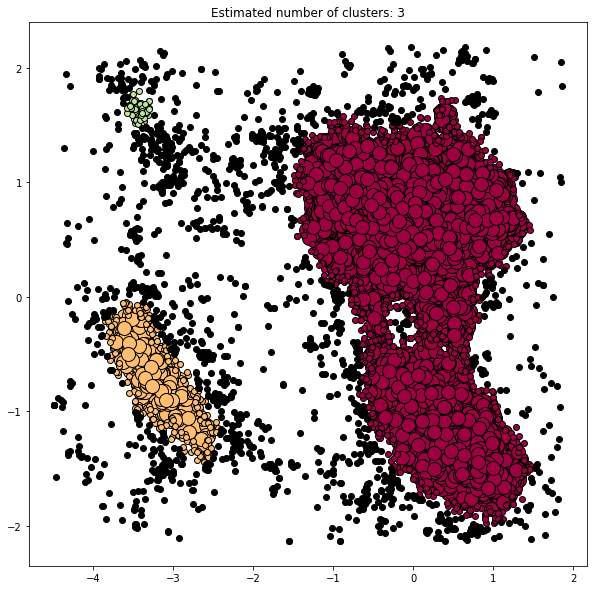

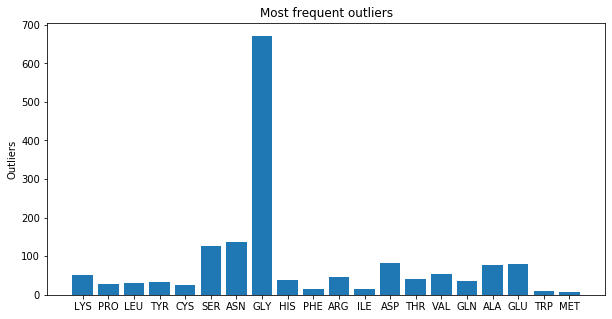

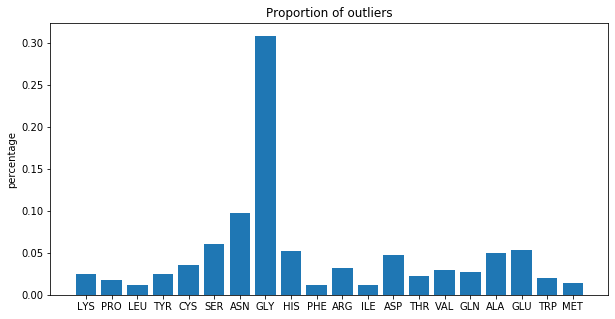

Estimated number of clusters: 3
Estimated number of noise points: 1605


In [27]:
# increase max distance, merges the two big clusters, not very robust.
drawDBSCAN(0.14,46)

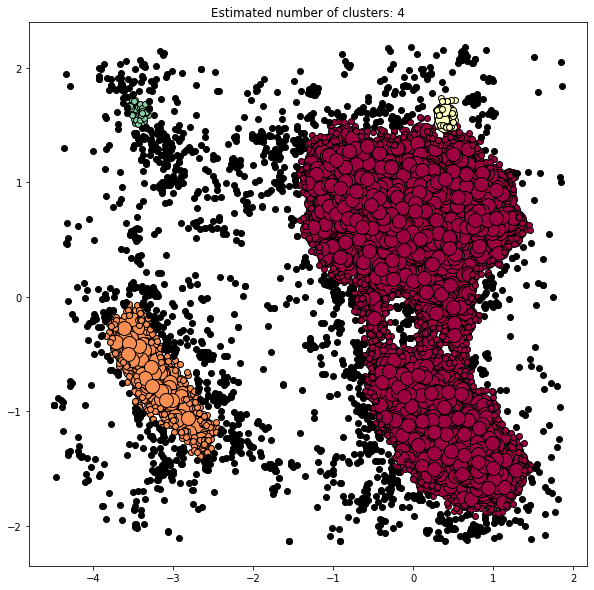

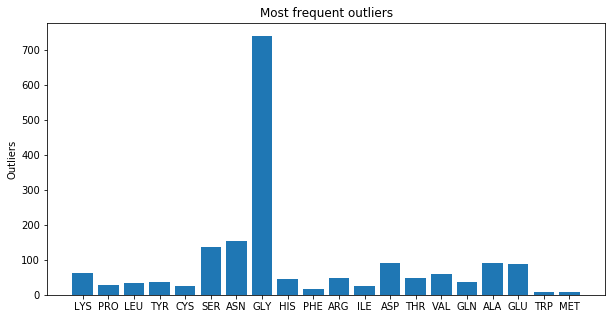

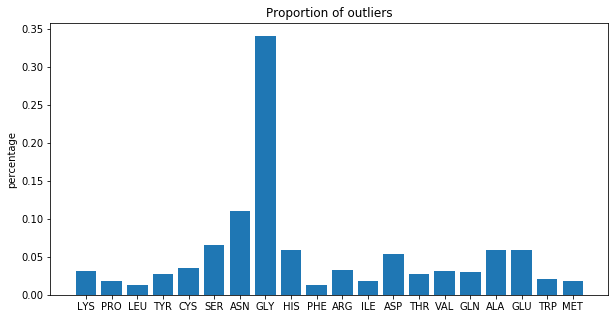

Estimated number of clusters: 4
Estimated number of noise points: 1786


In [28]:
# decrese min samples, merges the two big clusters, not very robust.
drawDBSCAN(0.13,45)

#### case 2: 3 cluster (including top left data) (max distance = 0.5, max samples = 120)
If we want to keep the sparse cluster on the top left and allow the two on the right to merge, the following values (0.5,120) seem to give a low amount of noise.

It was also easier to get less noise in this case than case 1, which means we can assign more data points to clusters.

The following 4 plots show that altering the values up and down won't reduce the amount of noise. Altering the values either gave more noise or gave 2 clusters rather than 3. It is possible and likely that one could reduce the amount of noise by fine tuning the values with more precision but it doesn't seem to improve drastically. Also, reducing noise too much could be bad since it would mean clustering some points that might be ambiguous; one point that seems to be right in between 2 clusters could still get assigned to one of the cluster even though it is very unlcear if it actually belongs there. In short, it can be good to have noise where it's uncertain where the data belongs.

The bar chars show again that GLY is the biggest outlier by far compared to the other acids. But this time just 1% of acids of the type GLY was marked as noise, which is very low especially compared to case 1.

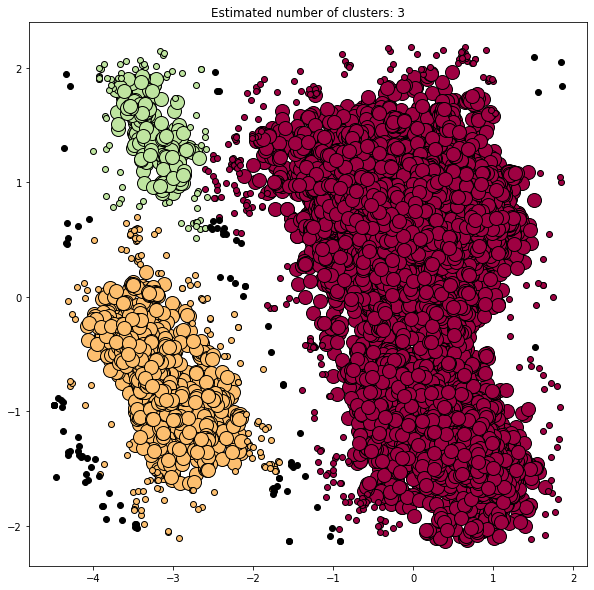

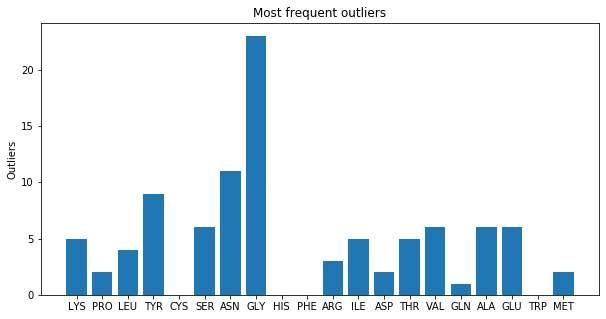

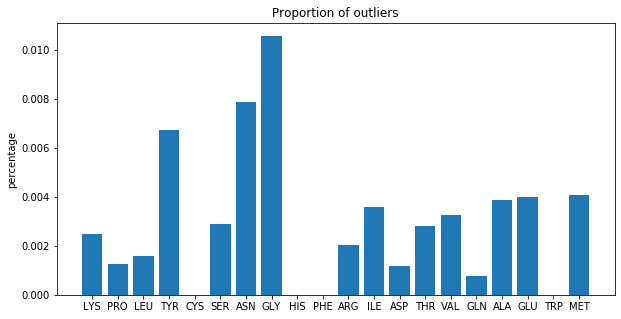

Estimated number of clusters: 3
Estimated number of noise points: 96


In [29]:
drawDBSCAN(0.5,120)

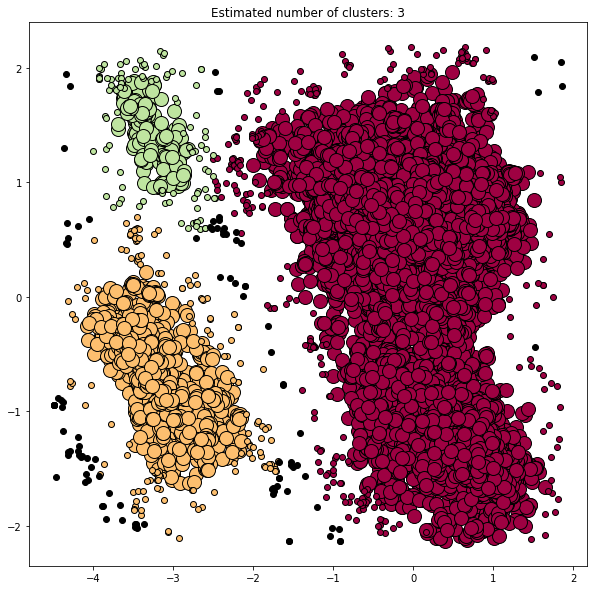

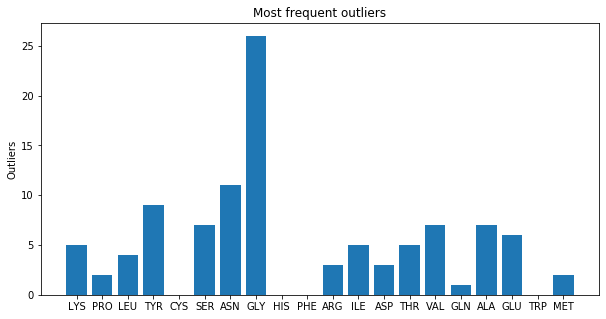

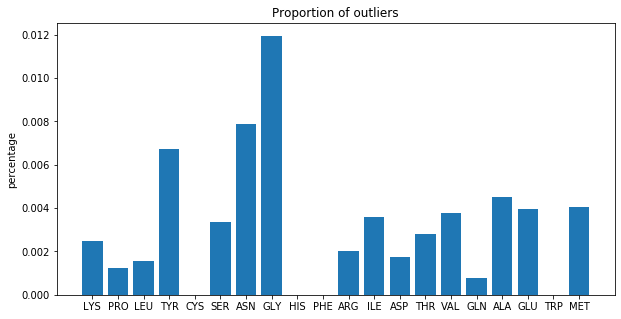

Estimated number of clusters: 3
Estimated number of noise points: 103


In [30]:
# increase min samples, only increases noise so it is robust in this direction
drawDBSCAN(0.5,130)

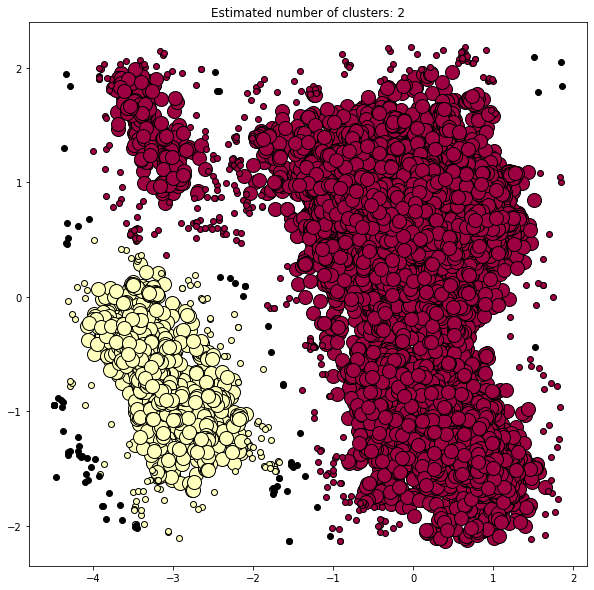

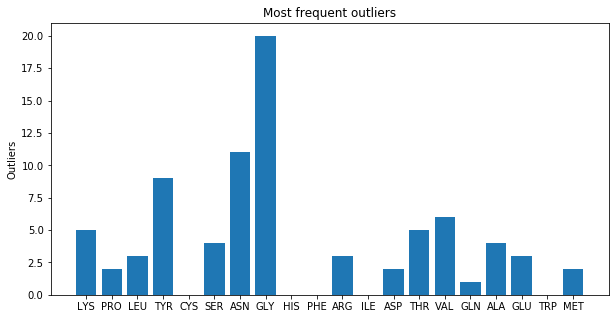

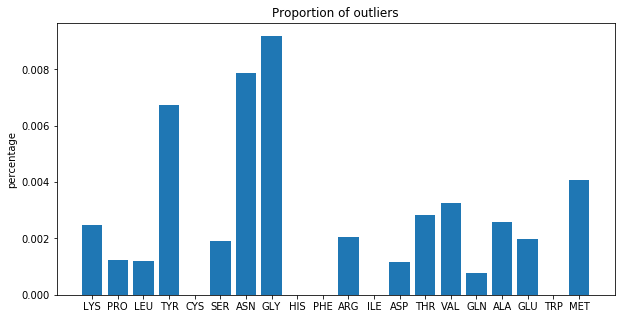

Estimated number of clusters: 2
Estimated number of noise points: 80


In [31]:
# decrease min samples, merges the top left cluster with the big ones, not robust
drawDBSCAN(0.5,110)

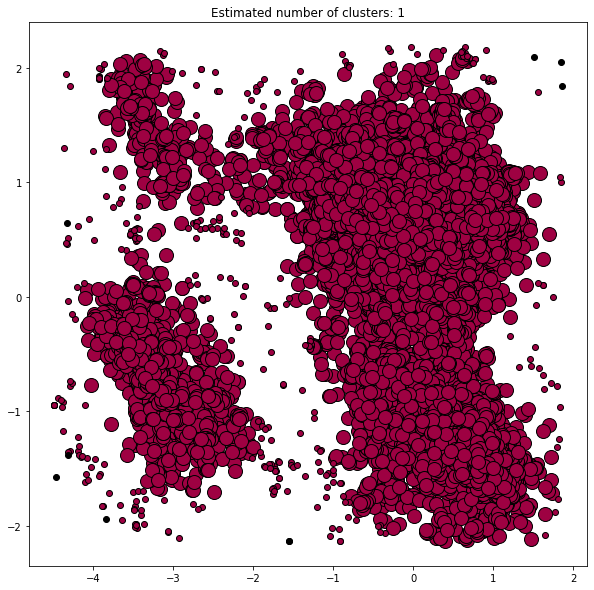

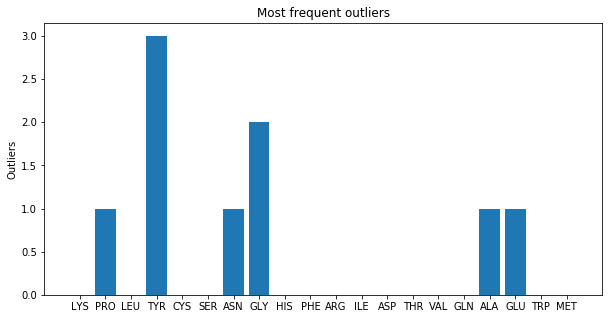

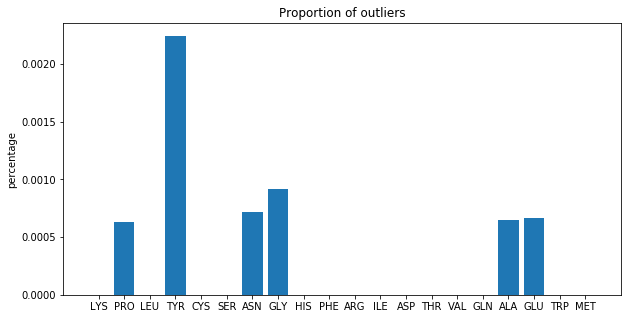

Estimated number of clusters: 1
Estimated number of noise points: 9


In [32]:
# increase max distance, merges all clusters, very unrobust
drawDBSCAN(0.6,120)

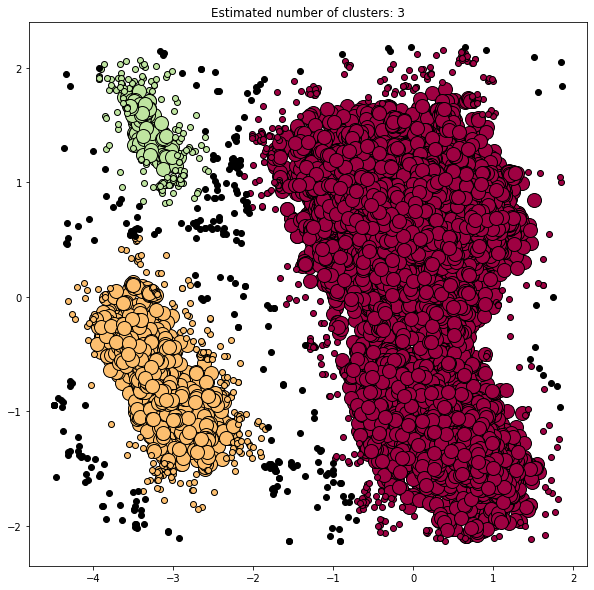

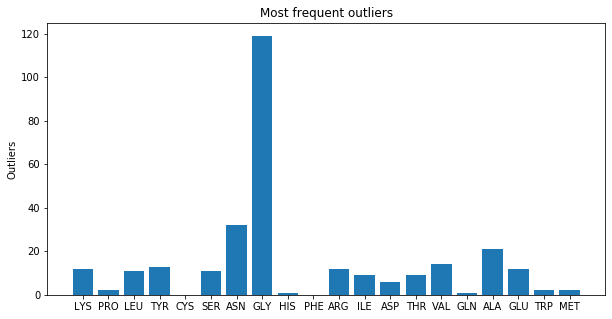

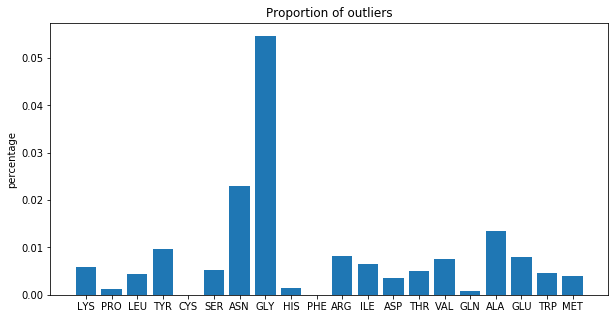

Estimated number of clusters: 3
Estimated number of noise points: 289


In [33]:
# decrease max distance, only increases noise so it robust in this direction
drawDBSCAN(0.4,120)

#### case 3: 3 clusters (excluding top left data) (max distance = 0.157, max samples = 68)
In this case we omitt the clusters that could represent the data on the top left and letting it be noise. We do this by increasing each parameter compared to case 1 (0.157,68). Doing this clusters can only be created where there are more denser sections of data points, which omitts the sparse data points on the top left. We tuned the parameters like this to separate the two big clusters on the right, to do this we need to decrease the max distance and or the min samples so the section between the big to clusters dont connect. This section between the big two clusters is almost as dense as the sparse cluster on the top left, reason being why it gets omitted. Note that it is possible to include the sparse cluster on the top left as demonstrated in case 1, but if we decide to omitt it we can tune the parameters more freely to decrease the amount of noise, which is what we did in this case. 

We have more noise in this compared to case 2 since more sparse points around the big clusters are omitted, as explained above.

The amount of noise comprebul to case on and agin GLY is jet again the moast frequent outlier, almost 35% the same as in case 1.

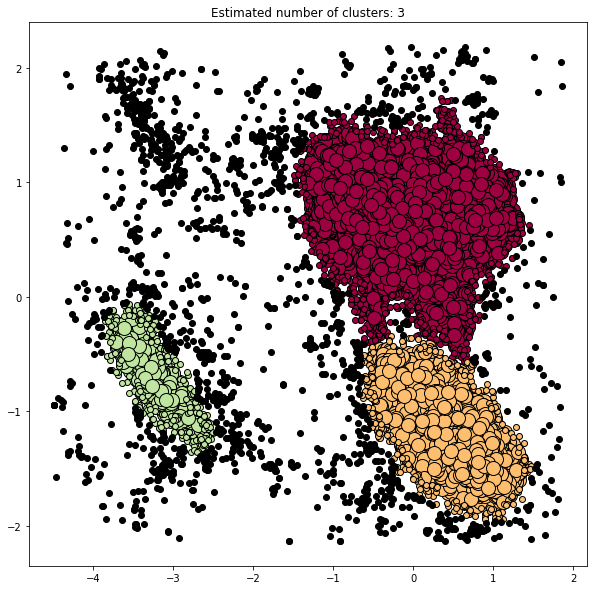

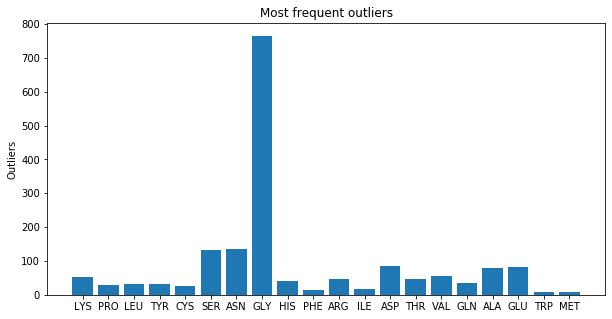

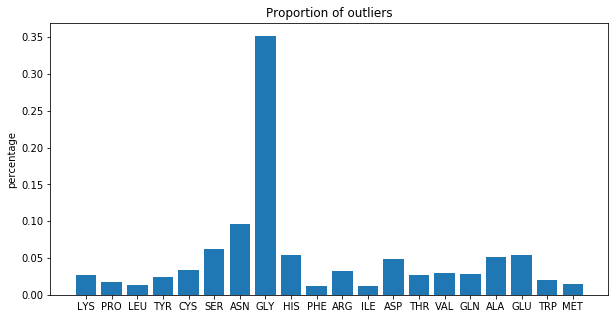

Estimated number of clusters: 3
Estimated number of noise points: 1722


In [34]:
drawDBSCAN(0.157,68)

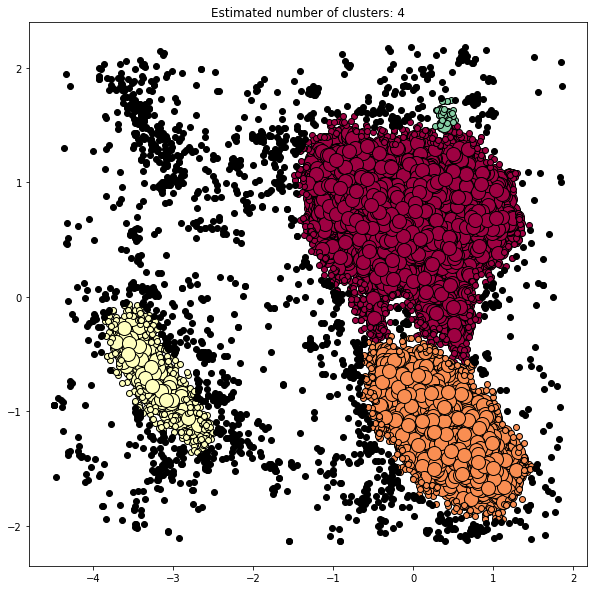

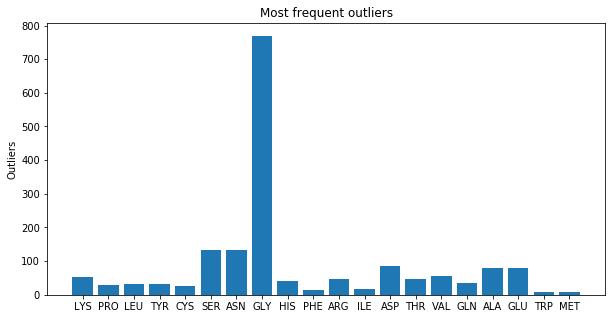

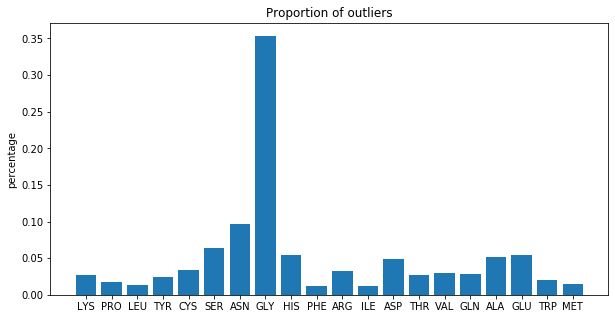

Estimated number of clusters: 4
Estimated number of noise points: 1730


In [35]:
# increasing min samples, gives more noise and another cluster. The cluster is very small and
# it is easy to tell it is supposed to belong to the big cluster belong, so it is still relatively robust in this direction
drawDBSCAN(0.157,69)

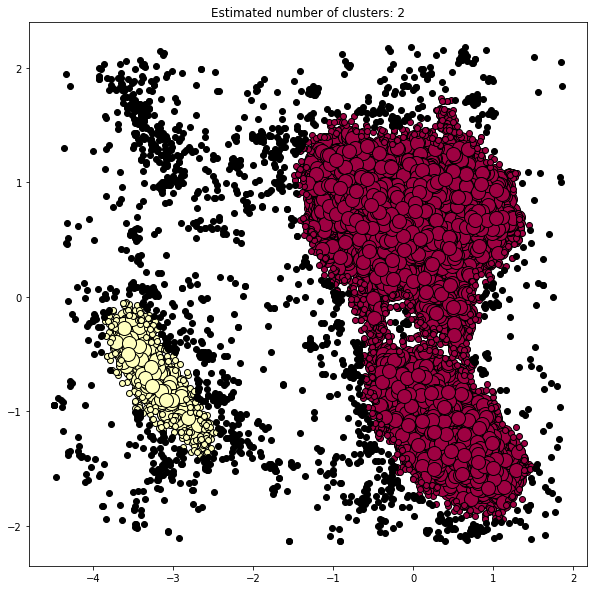

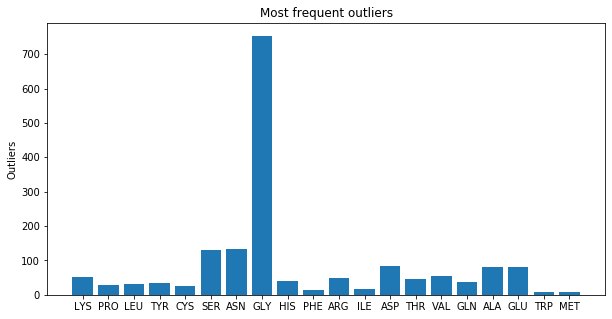

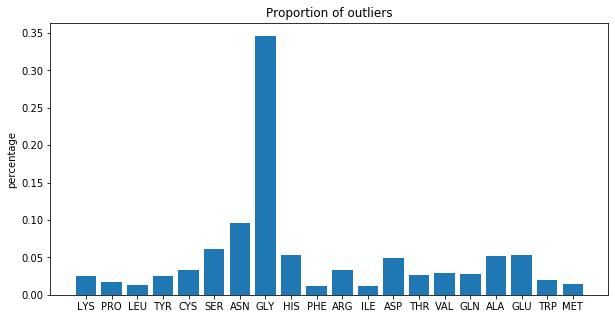

Estimated number of clusters: 2
Estimated number of noise points: 1704


In [36]:
# decreasing min samples, merges the two big clusters, not robust
drawDBSCAN(0.157,67)

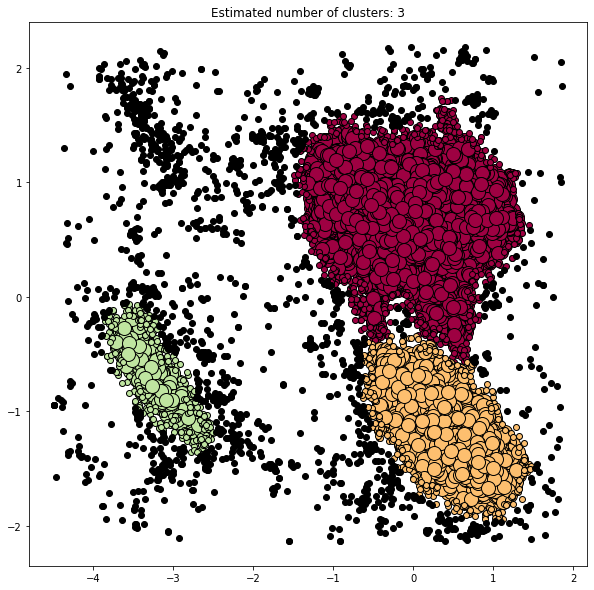

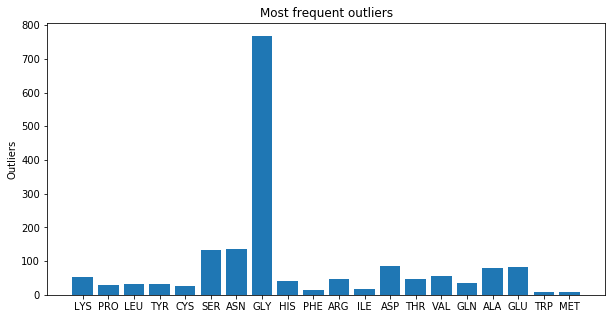

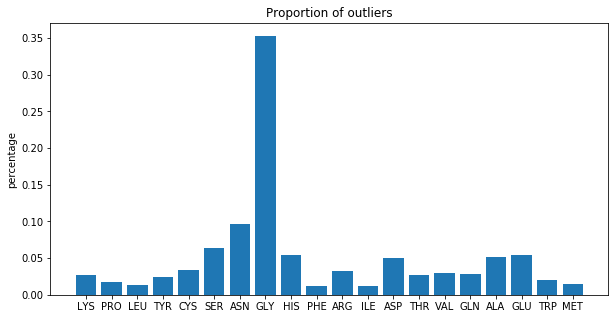

Estimated number of clusters: 3
Estimated number of noise points: 1732


In [37]:
# decreasing max distance, gives more noise, robust in this direction
drawDBSCAN(0.156,68)

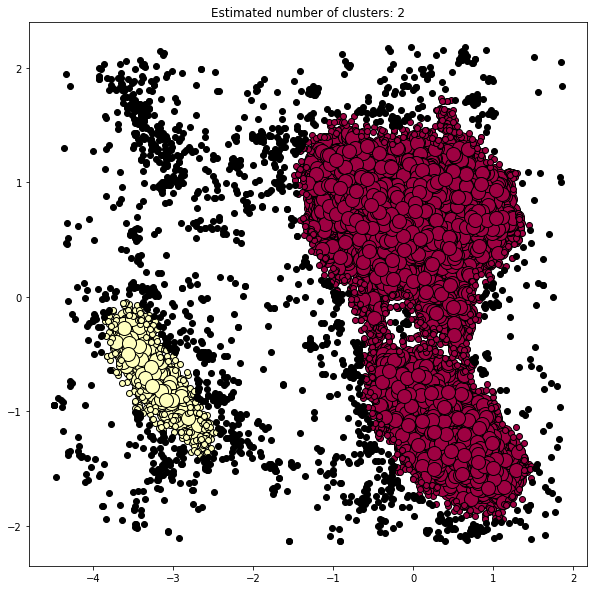

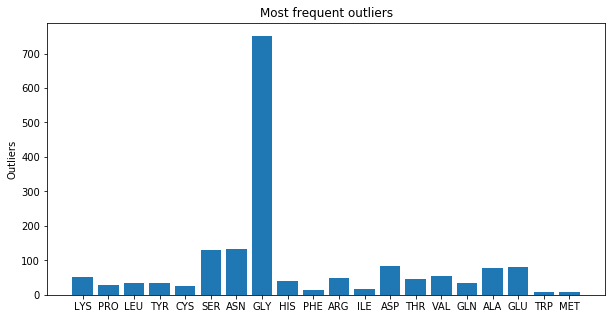

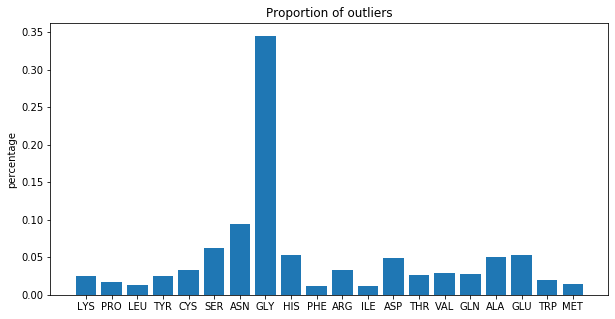

Estimated number of clusters: 2
Estimated number of noise points: 1699


In [38]:
# increasing max distance , merges the two big clusters, not robust
drawDBSCAN(0.158,68)

#### Final candidate and robustness
It is hard to say which solution out of the 3 cases is the best without further context. Altough, if we look at the amount of noise, case 1 has the most, then case 3 and case 2 has the least. If we compare case 2 and 3, we would say 3 is better. This is becase in case 2 we assign more data points to the "wrong" cluster (because we merge together both the big ones). We do omitt creating a cluster for the sparse points in the top left, but we think this is a fair tradeoff. We also have more noise in case 3 but noise can also be good as explained previously if you don't want to classify datapoints that you are uncertain about.

As for robustness, case 1 is the worst since it always changes the overall cluster separation no matter which parameter you change. For case 2 and 3 though you sometimes only change the amount of noise. More specificaly for each parameter in the two cases, you can always either increase it or decrease it and only increase noise, as dem onstrated (If we overlook the small cluster we got in case 3). That means we can make the clusters in case 2 and 3 more robust in all directions but simple tuning each parameter in the direction that only gives noise. This means that we will get a bit more noise, but altering the parameters from their new values will only give noise, no matter if you decrease or increase them. We will demonstrate this for our final candidate, case 3:

We choose (0.156,69) as parameters which corresponds to decreasing max distance and increasing min samples compared to case 3. We still get the samll extra cluster at the top though so we try to alter the parameters gradually to get rid of it. We have to increase min samples and descrease max distance to do this (as explained, altering them in the other direction changes the clustering dramatically):

We found that using the parameters (0.154,73) gave a good solution, is is therefore our final candidate for max distance and min samples. We only have about 150 more noise points compared to case 3 but this will inherently be the case when trying to fine tune the clustering like this to give more robustness.

Below the first plot we show 4 more plots, the same way we did for case 1,2 and 3 to show that altering the parameters will not change the clustering, meaning it is robust. Note that making big changes in the parameters will change the clusterings but one can make the DBSCAN more robust simply by tuning the variables like we did above, at the cost of more noise though.

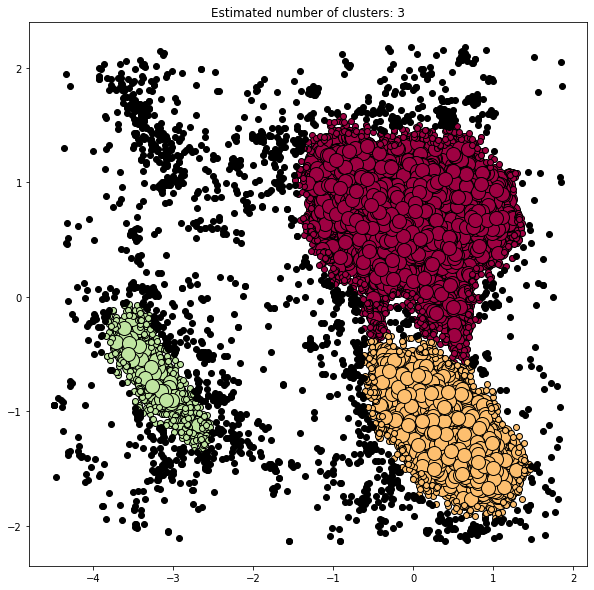

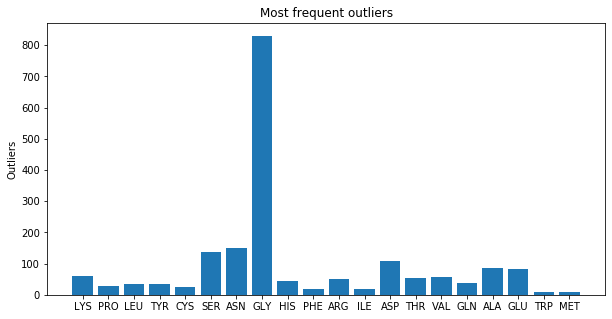

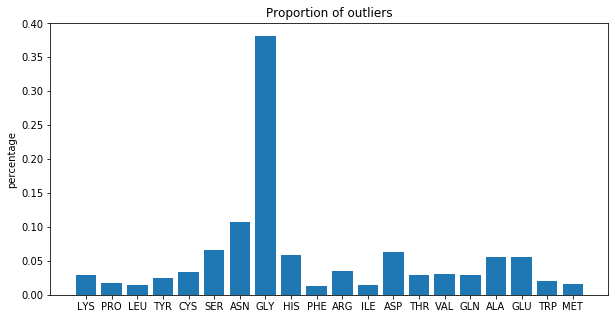

Estimated number of clusters: 3
Estimated number of noise points: 1874


In [39]:
drawDBSCAN(0.154,73)

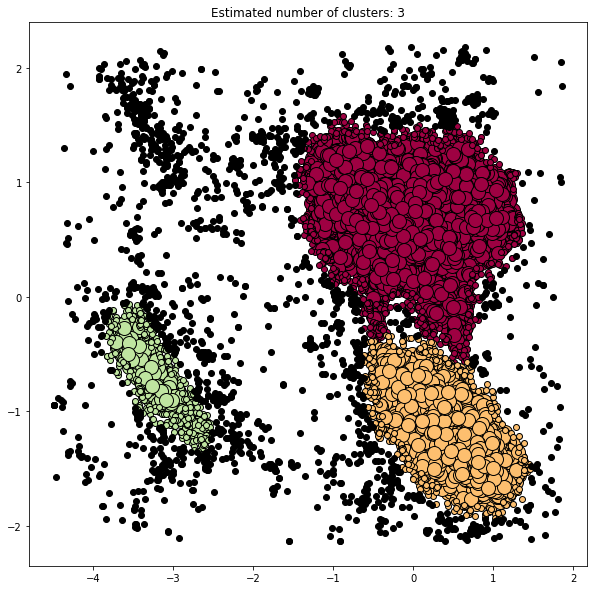

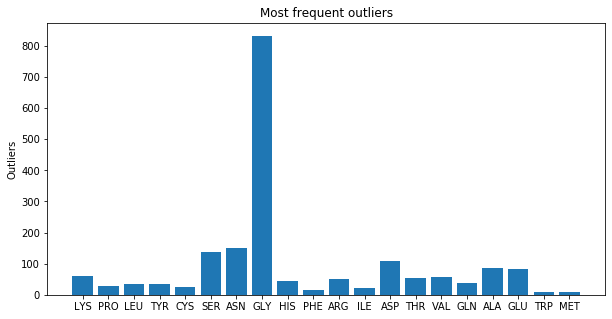

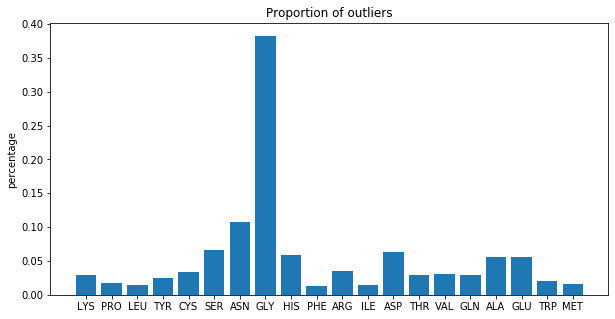

Estimated number of clusters: 3
Estimated number of noise points: 1880


In [40]:
# increase min samples, only more noise so it is robust in this direction
drawDBSCAN(0.154,74)

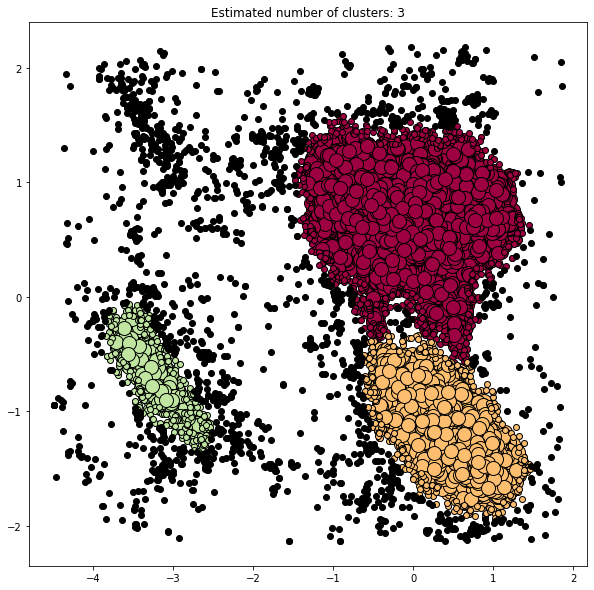

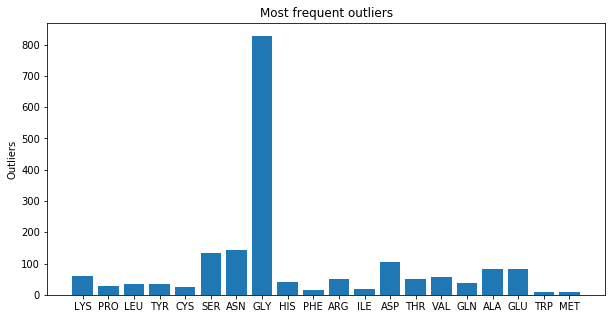

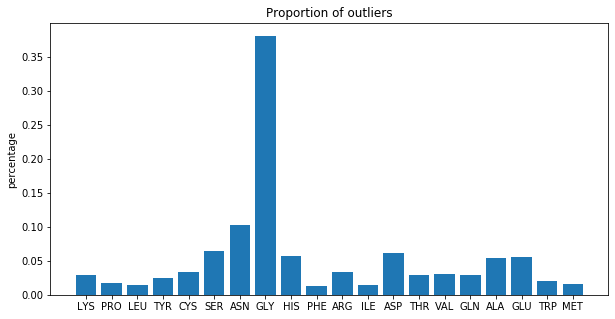

Estimated number of clusters: 3
Estimated number of noise points: 1847


In [41]:
# derease min samples, LESS noise so it is robust in this direction
drawDBSCAN(0.154,72)

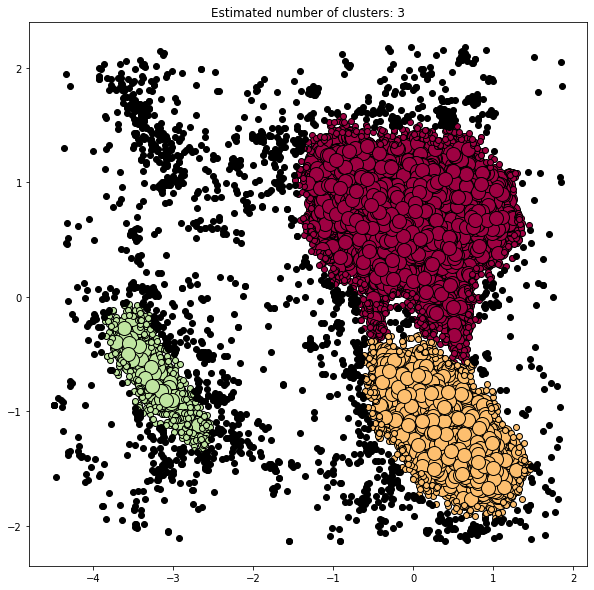

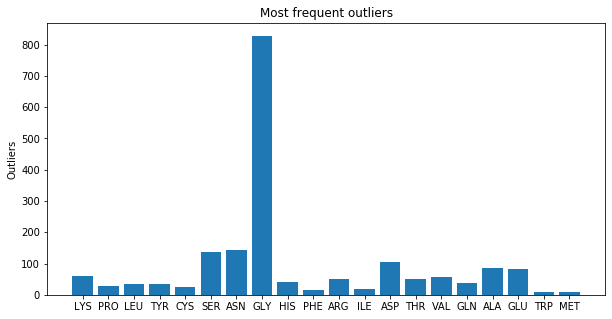

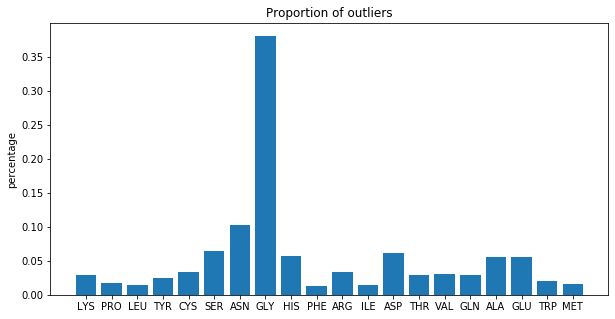

Estimated number of clusters: 3
Estimated number of noise points: 1852


In [42]:
# increase max distance, LESS noise so it is robust in this direction
drawDBSCAN(0.155,73)

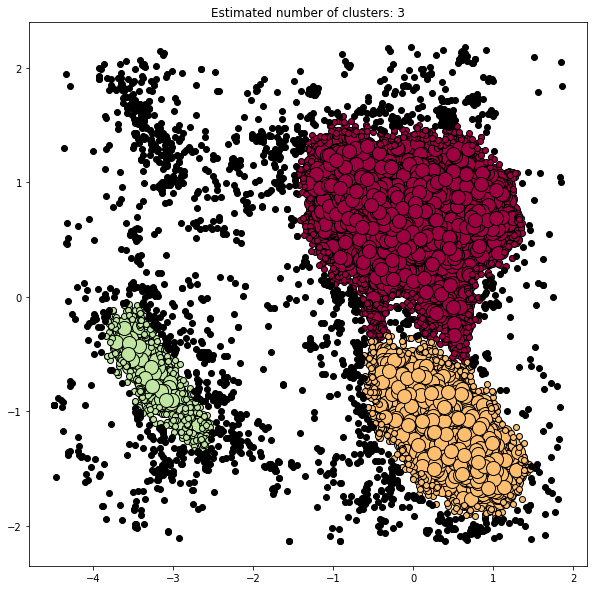

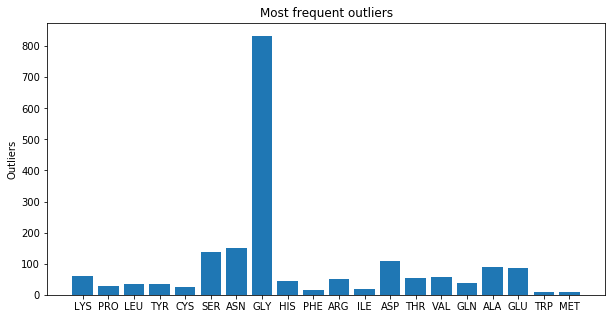

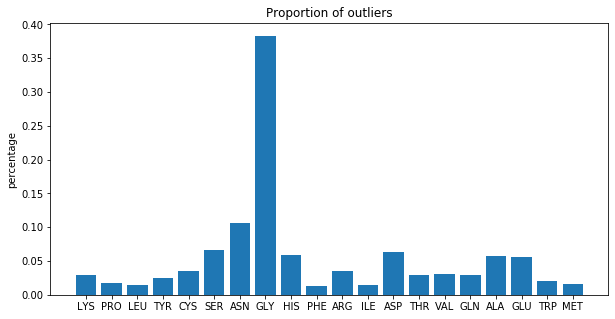

Estimated number of clusters: 3
Estimated number of noise points: 1883


In [43]:
# decrease max distance, only more noise so it is robust in this direction
drawDBSCAN(0.153,73)

### 3.c: Compare DBSCAN and k means clusters

A strength of DBSCAN is that it can omitt points that are too close to 2 different clusters, meaning it's too hard to tell which cluster they should belong to. This can make the clusters have higher classify less datapoints incorrectly but it can also be a downside if you absolutely need all points to be classified, even at the cost of some inaccuracy. We also saw that having less noise often mean getting less clusters, merging together unerlying clusters, which is also bad.

One does seem to have more control for DBSCAN compared to k-means in this case. We can only use a few reasonable values for k in k-means but for DBSCAN there's an infinite combinations of parameters. Having more fine tuning available can be good for making clusters that need to be precise, but it is also slower to do for that reason. It is probably harder to make DBSCAN clusters automatically since you can't input the number of clusters you want into the algorithm, it still needs to be tuned by hand. As for k-means, simply entering the number of clusters as k value is often sufficient for getting the best clustering you can get with k-means (entering start points for centroid points will also help, but is relatively easy to do by eye). This means a k-means clustering can be done fast since you dont need to tune it as much, You might need to use the elbow method to choose the correct k value if the amount of underlying clusters is not obvious, but this can also be done automatically.

Overall, DBSCAN is better in this case since we have time to fine tune so we can make clusterings somewhat true to the underlying data while having some noise points to demonstrate data that we are too uncertain to classify, which can be good.

In general DBSCAN works better on datasets of different shapes as compared to k-means which works best on "cloud" shaped data.

## 4: Comparison of clusters
For each of the two amino acids we will first plot them on top of all the raw data to show how they align. From there we can guess how we should try to cluster them. We make a k emans and dbscan clustering for each amino acid. We will use trial and error to get a robust solution with low amount of noise in the dbclusterings in the same way we did in task 3 above (so we wont explain the entire process again). We can expect to get less noise when we only use one amino acid at a time since there are less data points in total we need to cluster and they hopefully belong to only a few underlying clusters,

In [44]:
def scatterPlotAcid(residueName):
    residue = df.loc[df['residue name'] == residueName]
    not_residue = df.loc[df['residue name'] != residueName] 
    
    # Data and cordinates for the specified amino acid
    residue_Data = residue[['phi','psi']]
    residue_x = residue['phi']
    residue_y= residue['psi']
    
    # Data and cordinates for rest of the amino acids
    not_residue_Data = not_residue[['phi','psi']]
    not_residue_x = not_residue['phi']
    not_residue_y= not_residue['psi']
    
    # draw scatter plots
    plt.figure(figsize=(10,10))
    plt.title('scatter plot (Orange: ' + residueName + ')')
    plt.scatter(not_residue_x, not_residue_y)
    plt.scatter(residue_x, residue_y)

In [45]:
def kMeansAndElbow(residueName, include, k):
    if(include):
        residue = df.loc[df['residue name'] == residueName] # in this case we will onley look at specified acid
    else:
        residue = df.loc[df['residue name'] != residueName] # in this case we will look at all the acid except the specified one
        
    # Data and cordinates for the specified amino acid(s)
    residue_Data = residue[['phi','psi']]
    residue_x = residue['phi']
    residue_y= residue['psi']
    
    # K-means and elbow curvs
    drawClusters_Data(k, residue_Data, residue_x, residue_y )
    ElbowCurve_Data(residue_Data)

In [46]:
def DBSCAN_Acid(residueName, include, max_distance, min_samples):
    
    if(include):
        residue = df.loc[df['residue name'] == residueName] # in this case we will onley look at specified acid
    else:
        residue = df.loc[df['residue name'] != residueName] # in this case we will look at all the acid except the specified one
        
    # Data and cordinates for the specified amino acid(s)
    residue_Data = residue[['phi','psi']]
    residue_x = residue['phi']
    residue_y= residue['psi']
    
    # DBSCAN
    drawDBSCAN_Data(max_distance, min_samples, residue_Data, residue)

In [47]:
max_distance = 0.5
min_samples = 120 

All of the k valuse we will use in the following section are all based on thier associated elbow curve.

### scatter plot PRO

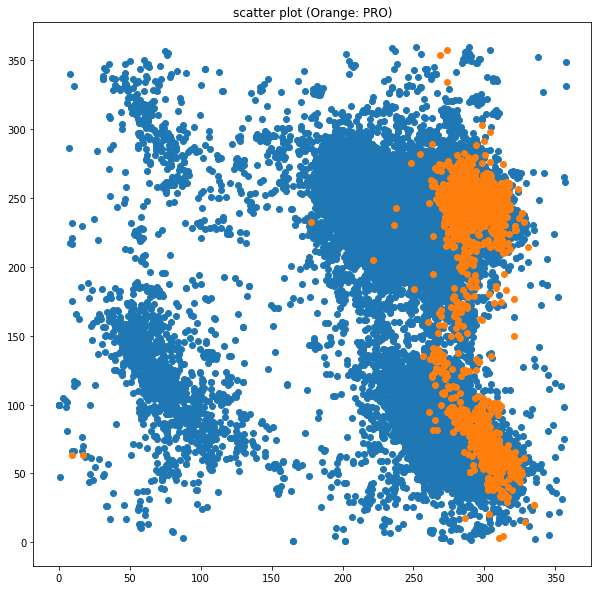

In [48]:
scatterPlotAcid('PRO')

### k-means PRO
We see in the plot above that the pro acid spans across the two big clusters so we try k=2:

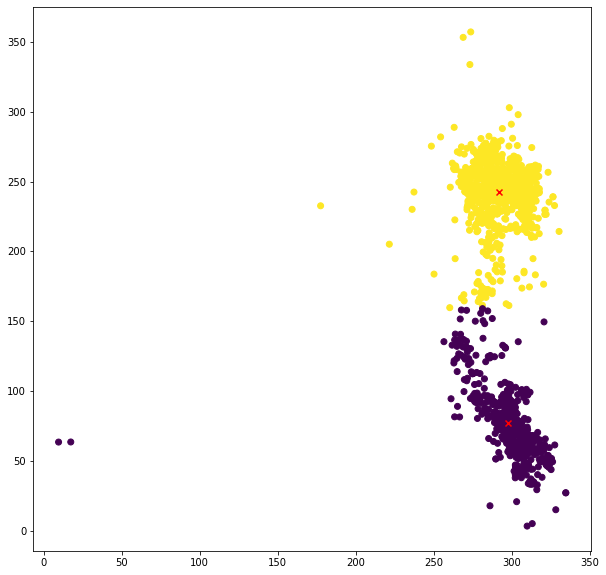

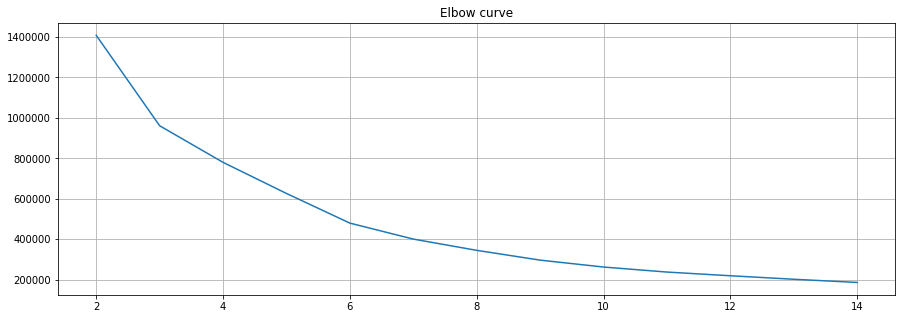

In [58]:
kMeansAndElbow('PRO', True, 2)

### comment 
We see that the two clusters align well according to the clusters you get with k=5 used on the entire data set. We have two points to the left that may seem like incredible outliers, but because the data is periodic the left and right side are in reality "connected" so they are relative close to the cluster.

The elbow method tells us k=3 might be a better candidate so we will plot that below

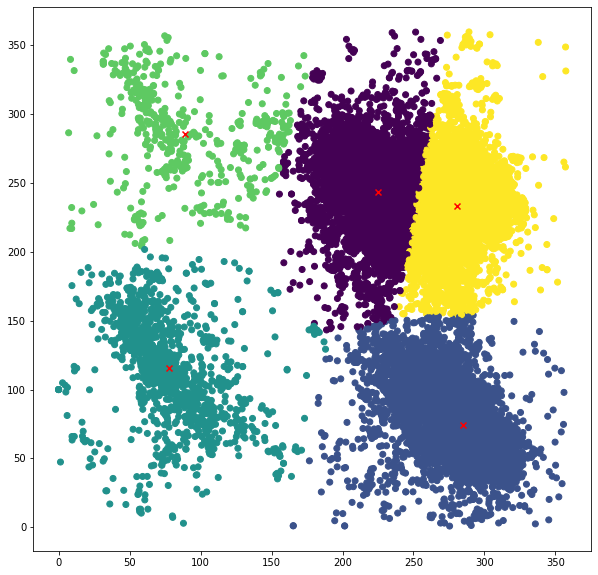

In [60]:
drawClusters(5)

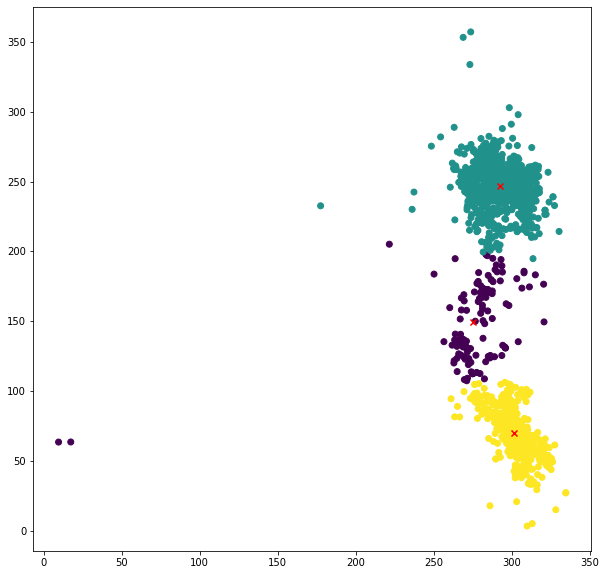

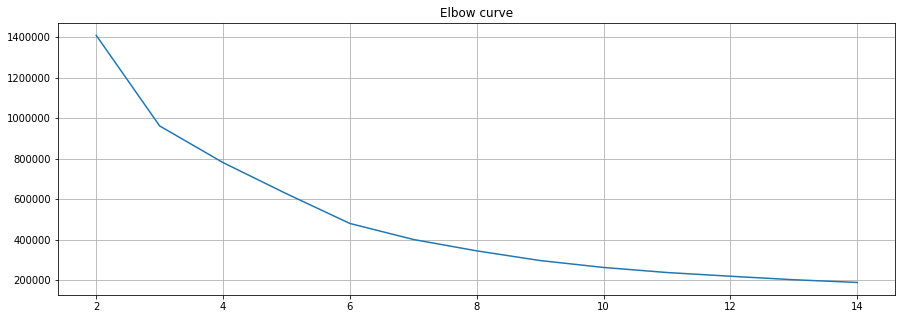

In [61]:
kMeansAndElbow('PRO', True, 3)

We see that k=3 could also be a good candidate, the clusters dont align to the two big clusters in the plot above where we use all the data. But it still looks like each cluster is coherent and have different densities. It may very well be that there are actually 3 underlying clusters for the PRO acid that isn't very noticeable in the plot with every data. We will choose k=3 as the solution though since it looks more coherent.

### DBSCAN PRO

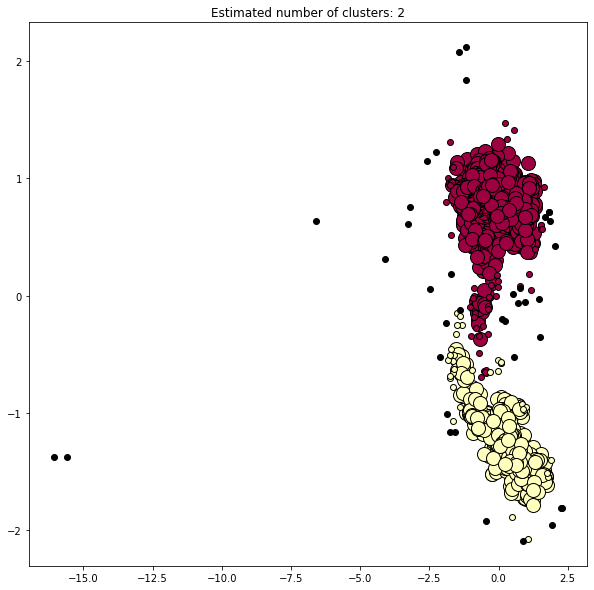

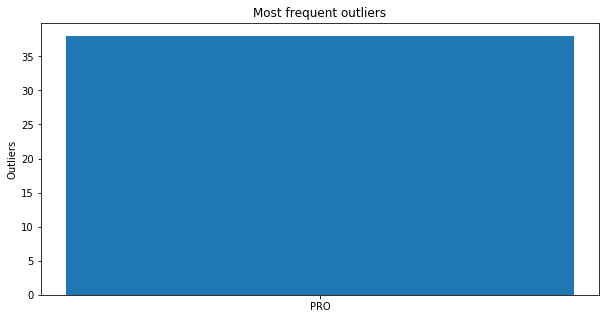

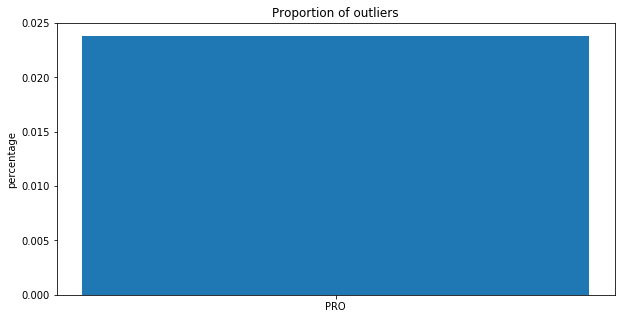

Estimated number of clusters: 2
Estimated number of noise points: 38


In [92]:
DBSCAN_Acid('PRO', True, 0.35, 30)

#### comment
The clusters align well with the clusters where we used all the data. This clustering seems very reasonable and it only has 3% noise. There are way fewer points that are spread really far away from the main chunks which gives this low noise level. We can show the difference to the dbscan of all the data as seen below:

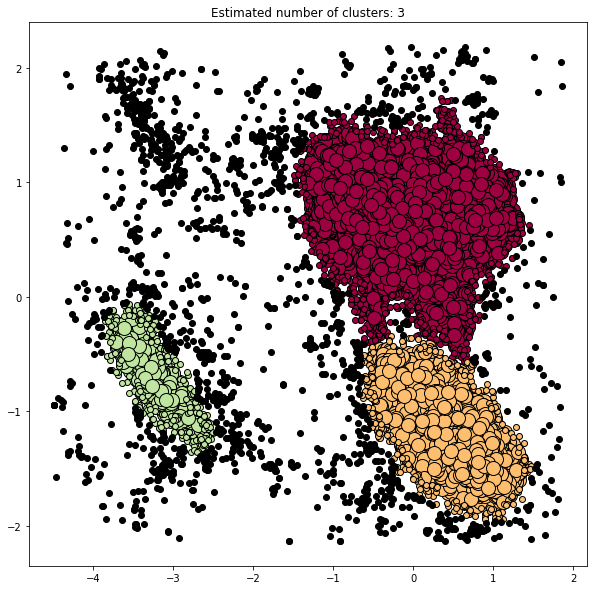

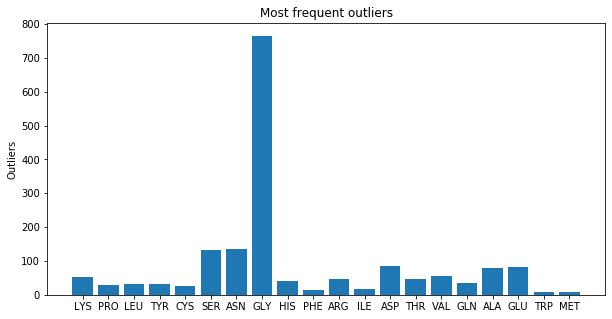

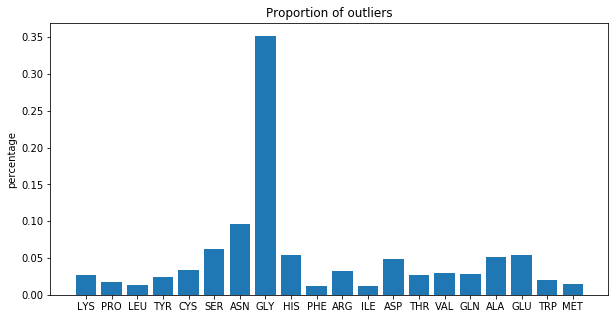

Estimated number of clusters: 3
Estimated number of noise points: 1722


In [83]:
drawDBSCAN(0.157, 68)

#### comment
We see that we also went from having about 50 noise PRO points to only 37, so it is probably got to divide the data like this

## GLY

### GLY scatter plot

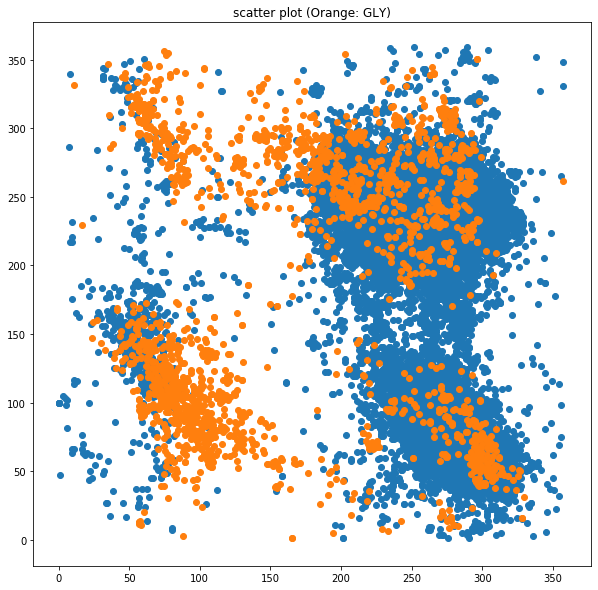

In [53]:
scatterPlotAcid('GLY')

### GLY k-means
we see that the gly acid seem to spread out across all underlying clusters (which there are 4 of) so we choose k=4. The gly data that span over the top 2 clusters seem to bleed into each other a bit though, so k= might also work.

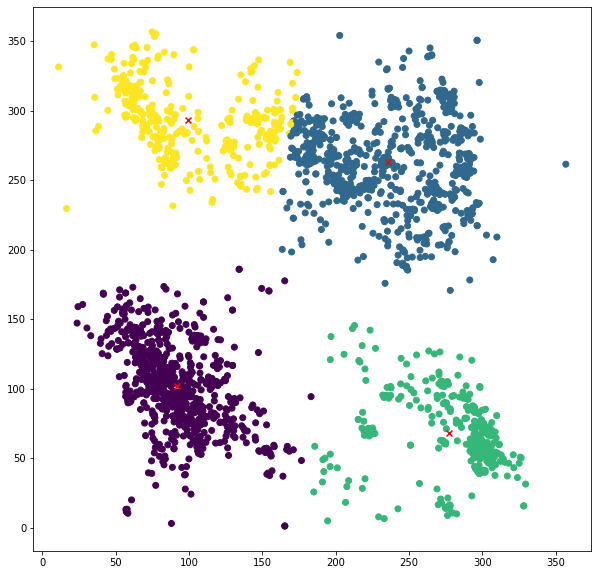

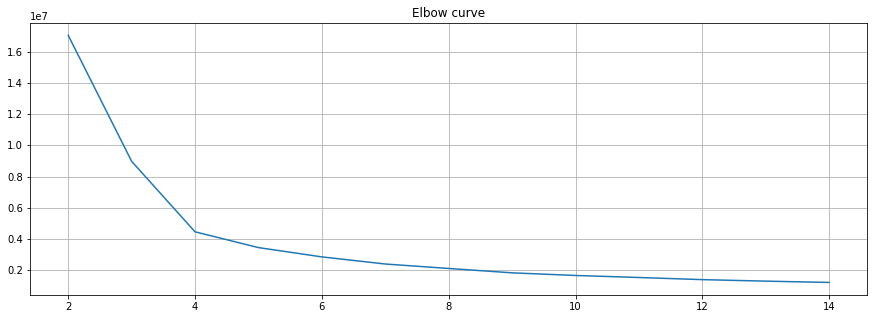

In [54]:
kMeansAndElbow('GLY', True, 4)

### comment
We see that k=4 makes gly clusters that are very well aligned to the clusters on all the data as shown in the plot below. The elbow method also shows a clear indication that k=4 is a good solution. 

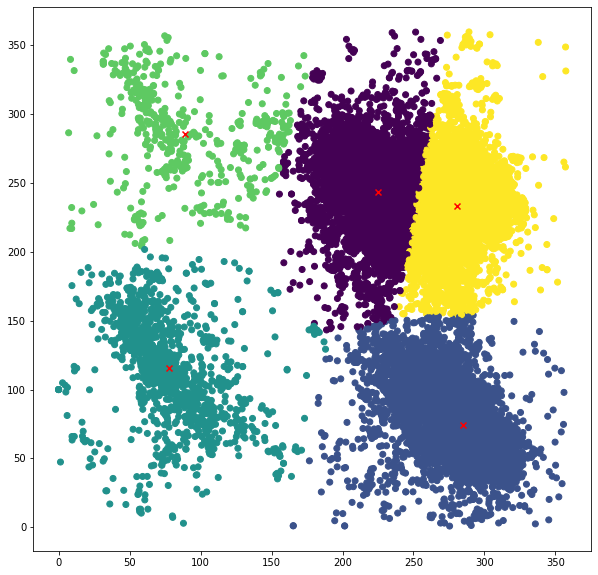

In [93]:
drawClusters(5)

### GLY DBSCAN

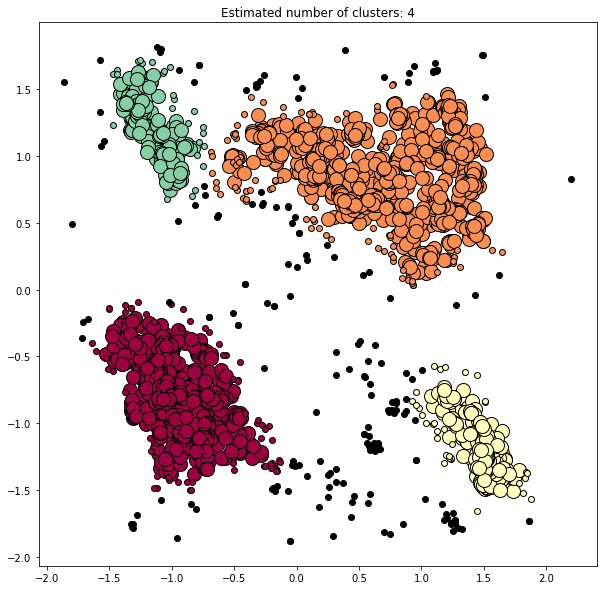

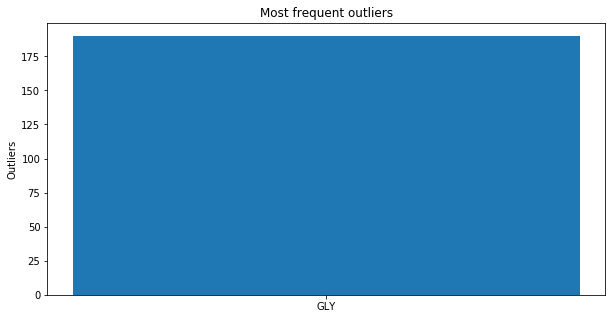

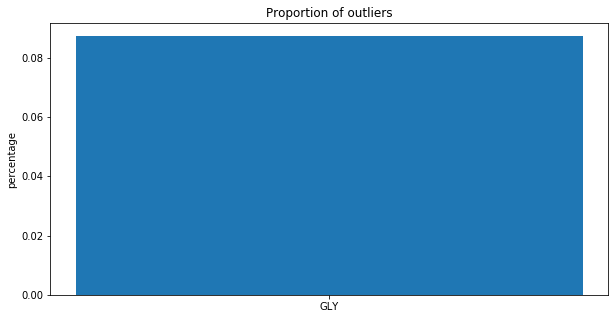

Estimated number of clusters: 4
Estimated number of noise points: 190


In [107]:
DBSCAN_Acid('GLY', True, 0.18, 23)

### comment
It was way easier to get 4 clusters when we only have gly compared to when we had all the data at the same time. This means we get way less noise (180 compared to 180) since a lot of gly points are in the top left which was completely omitted in the clustering with all the data (which is shown below again).

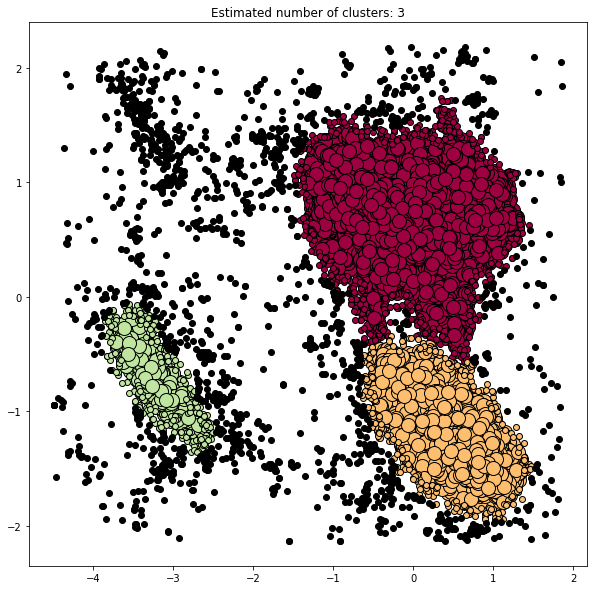

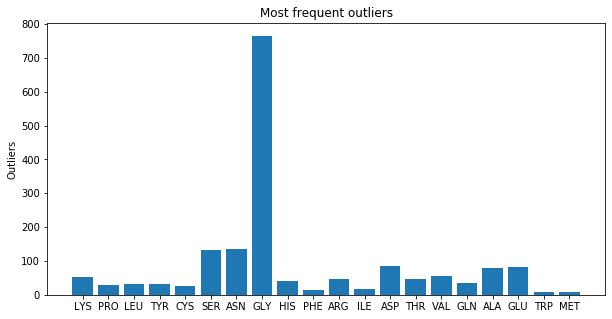

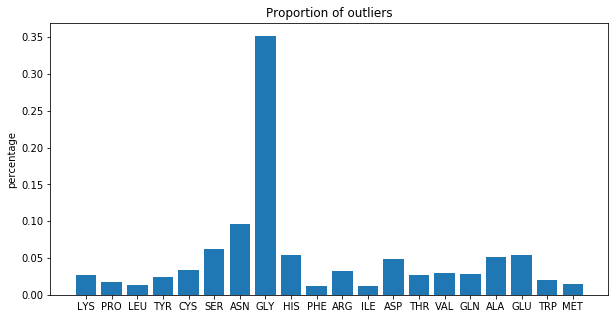

Estimated number of clusters: 3
Estimated number of noise points: 1722


In [108]:
drawDBSCAN(0.157,68)